In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
my_df = pd.DataFrame(digits.data, columns=digits.feature_names)
my_df['target'] = digits.target
my_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

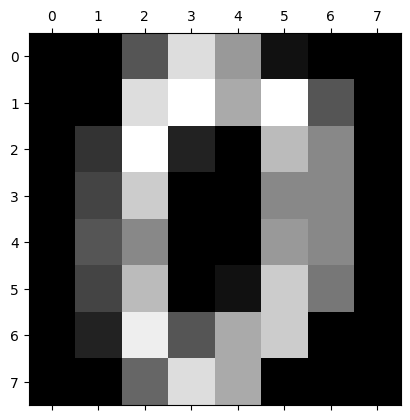

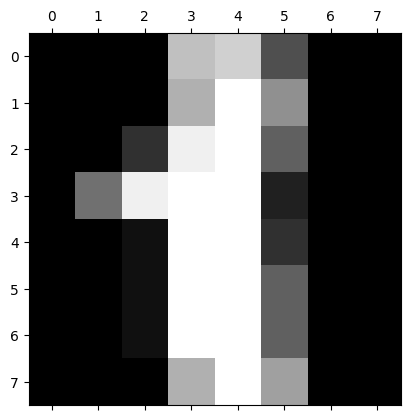

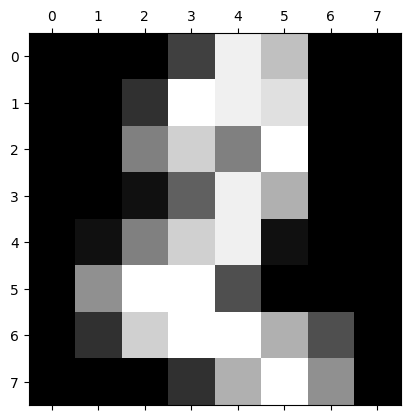

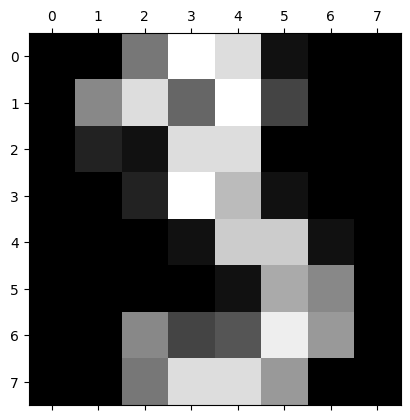

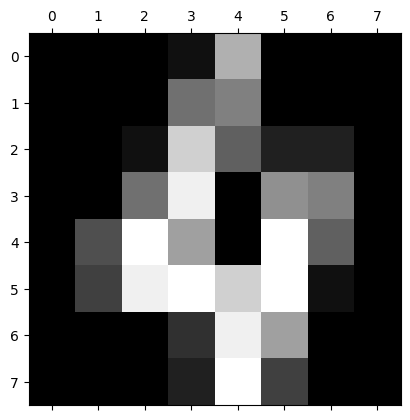

In [14]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [18]:
# Creating input and target dataframes
inputs = my_df.drop(columns=['target'])
target = my_df['target']
inputs.shape, target.shape

((1797, 64), (1797,))

In [19]:
# Splitting the datasets in train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training datasets: ", inputs_train.shape, target_train.shape)
print("Testing datasets: ", inputs_test.shape, target_test.shape)

Training datasets:  (1437, 64) (1437,)
Testing datasets:  (360, 64) (360,)


In [20]:
# Building the RandomForrest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [21]:
# Training the model using training datasets
model.fit(inputs_train, target_train)

RandomForestClassifier()

In [22]:
model.score(inputs_test, target_test)

0.9777777777777777

In [24]:
# Finding predicted values using the trained model and test dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((360,), (360,))

Model accuracy score:  0.9777777777777777
Model precision score:  0.9780955281854844
Model f1 score:  0.9797706876177701
Model recall score:  0.9820205733808673


Text(33.22222222222222, 0.5, 'Actual')

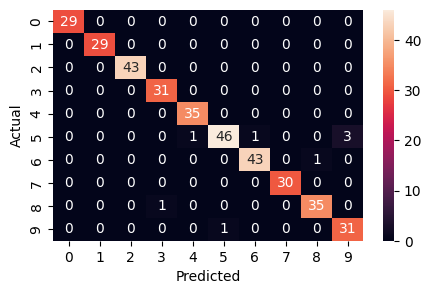

In [25]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
#print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, average='macro'))
#print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")